# Filtracja bilateralna

## Konwolucja obrazu z filtrem o zadanych współczynnikach

Splot (konwolucję) obrazu wejściowego $I$ z filtrem $\psi$ dla ustalonego punktu obrazu $\mathbf{x}$ można przedstawić następująco:

\begin{equation}
\hat{I}(\mathbf{x}) = \frac{1}{W_N}\sum_{\mathbf{p} \in \eta(\mathbf{x})} \psi(||\mathbf{p}-\mathbf{x}||)I(\mathbf{p})
\end{equation}

gdzie:
- $\hat{I}$ jest obrazem wynikowym (przefiltrowanym),
- $W_N = \sum_y \psi(y)$ jest parametrem normalizującym współczynniki filtra $\psi$,
- $||\cdot||$ jest odległością między punktami obrazu $\mathbf{x}$ i $\mathbf{p}$ według ustalonej metryki (np. norma $L_2$). Uwaga, proszę pamiętać, że zarówno $\mathbf{x}$, jak i $\mathbf{p}$ to współrzędne przestrzenne,
- $\eta(\mathbf{x})$ jest otoczeniem punktu $\mathbf{x}$.

Funkcja $\psi$ decyduje o charakterze filtracji. Dla filtru Gaussowskiego:

\begin{equation}
\psi(y) = G_{\delta_s}(y)
\end{equation}

gdzie: $G_{\delta_s}(y)$ jest funkcją Gaussa z parametrem skali $\delta_s$.

Opisaną powyżej filtrację realizowaliśmy w ramach ćwiczenia "Przetwarzanie wstępne. Filtracja kontekstowa."

## Filtracja bilateralna

Wadą klasycznego splotu jest brak adaptacji współczynników filtra do lokalnego otoczenia $\eta(\mathbf{x})$ filtrowanego punktu $\mathbf{x}$.
Oznacza to wykorzystanie tych samych współczynników filtra $\psi$ niezależnie od tego czy otoczenie jest względnie jednorodne lub zawiera krawędzie obiektów (w tym przypadku dochodzi do "rozmywania" krawędzi).
Filtracja bilateralna uwzględnia lokalne otoczenie filtrowanego punktu, w ten sposób, że parametry filtra zmieniają się w zależności od "wyglądu" otocznia.


Współczynniki filtra obliczane są na podstawie odległości filtrowanego punktu $\mathbf{x}$ od każdego punktu otoczenia $\mathbf{p}$ w dziedzinie przestrzennej obrazu (tak jak przy typowym filtrze np. Gaussa) oraz odległości punktów w przeciwdziedzinie obrazu (np. na podstawie różnicy w jasności pikseli dla obrazu w odcieniach szarości):

\begin{equation}
\hat{I}(\mathbf{x}) = \frac{1}{W_N}\sum_{\mathbf{p} \in \eta(\mathbf{x})} \psi(||\mathbf{p}-\mathbf{x}||) \gamma(|I(\mathbf{p}) - I(\mathbf{x})|) I(\mathbf{p})
\end{equation}
gdzie:
- $W_N$ jest współczynnikiem normalizującym filtr,
- $\gamma$ jest funkcją odległości w przeciwdziedzinie obrazu, np. $\gamma(y)=\exp(-\frac{y^2}{2\delta_r^2})$
- parametr $\delta_r$ jest utożsamiany z poziomem szumu w obrazie i należy go dobrać w sposób empiryczny.

Proszę chwilę zastanowić się nad powyższym równaniem, w szczególności nad funkcją $\gamma$. Proszę wyznaczyć, jaka będzie wartość funkcji dla pikseli podobnych (różnica 0, 1, 2), a skrajnie różnych (255, 200).

##  Realizacja ćwiczenia

### Wczytanie danych

1. Wczytaj dane z pliku *MR_data.mat*. W tym celu wykorzystaj funkcję `loadmat` z pakietu scipy:
        from scipy.io import loadmat
        mat = loadmat('MR_data.mat')

2. Wczytany plik zawiera 5 obrazów: *I_noisefree*, *I_noisy1*, *I_noisy2*, *I_noisy3* oraz *I_noisy4*. Odczytać je można w następujący sposób:
        Input = mat['I_noisy1']

3.Wyświetl wybrany obraz z pliku *MR_data.mat*. Zagadka - co to za obrazowanie medyczne?

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.io import loadmat
import math
import os

if not os.path.exists("MR_data.mat") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/07_Bilateral/MR_data.mat --no-check-certificate

mat = loadmat('MR_data.mat')

If = mat['I_noisefree']
I1 = mat['I_noisy1']
I2 = mat['I_noisy2']
I3 = mat['I_noisy3']
I4 = mat['I_noisy4']

In [2]:
def plot(imgs, titles):
    [f, ax] = plt.subplots(1,len(imgs))
    f.set_size_inches(15,15)
    for i in range(len(imgs)):
        ax[i].imshow(imgs[i], 'gray')
        ax[i].axis('off')
        ax[i].set_title(titles[i])

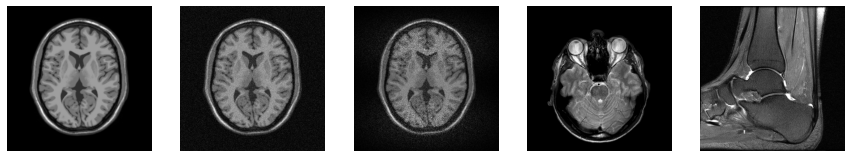

In [3]:
plot([If,I1,I2,I3,I4],["","","","",""])

### "Klasyczna" konwolucja

1. Zdefiniuj parametry filtra Gaussowskiego: rozmiar okna i wariancję $\delta_S$.
2. Oblicz współczynniki filtra na podstawie zdefiniowanych parametrów (najprościej w ramach podwójnej pętli for).
2. Sprawdź ich poprawność i zwizualizuj filtr (tak jak w ćwiczeniu pt. "Przetwarzanie wstępne. Filtracja kontekstowa.").
3. Wykonaj kopię obrazu wejściowego: `IConv = Input.copy()`
4. Wykonaj podwójną pętlę po obrazie. Pomiń ramkę, dla której nie jest zdefiniowany kontekst o wybranej wielkości.
5. W każdej iteracji stwórz dwuwymiarową tablicę zawierającą aktualny kontekst.
6. Napisz funkcję, która będzie obliczała nową wartość piksela.
Argumentem tej funkcji są aktualnie przetwarzane okno i współczynniki filtra.
7. Obliczoną wartość przypisz do odpowiedniego piksela kopii obrazu wejściowego.
8. Wyświetl wynik filtracji.
9. Porównaj wynik z obrazem oryginalnym.

In [4]:
#TODO Samodzielna


def conv(I, s, w):
    m = n = s
    h, k = m//2, n//2
    x, y = np.mgrid[-h:h+1, -k:k+1]
    g = np.exp(-(x**2 + y**2)/(2*w**2))
    g = g /g.sum() 
    
#     fig = plt.figure()
#     ax = fig.gca(projection='3d')
#     X = np.arange(-s//2, s//2, 1)
#     Y = np.arange(-s//2, s//2, 1)
#     X, Y = np.meshgrid(X, Y)
#     Z = g
#     ax.plot_surface(X, Y, Z)
#     plt.show()

    Ic = I.copy()
    sx = len(I)
    sy = len(I[0])
    
    for i in range(s//2, sx-s//2):
        for j in range(s//2,sy-s//2):
            ctx = I[i-(s//2):i+(s//2)+1,j-(s//2):j+(s//2)+1].astype('float')
            p = 0
            for ii in range(len(ctx)):
                for jj in range(len(ctx[ii])):
                    p = p+ctx[ii][jj]*g[ii][jj]
            Ic[i][j] = p

    return Ic
    

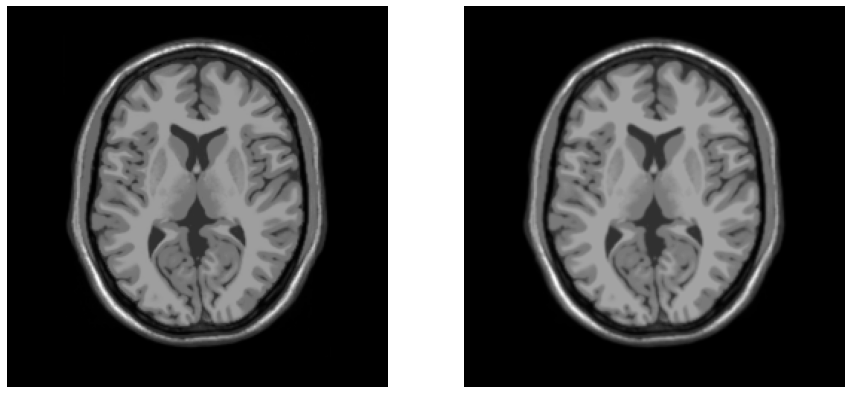

In [5]:
plot([If,conv(If,9,0.5)],["",""])

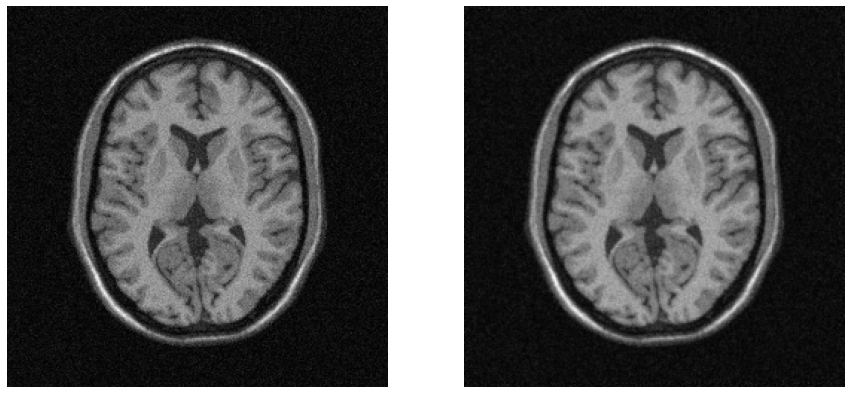

In [6]:
plot([I1,conv(I1,9,0.5)],["",""])

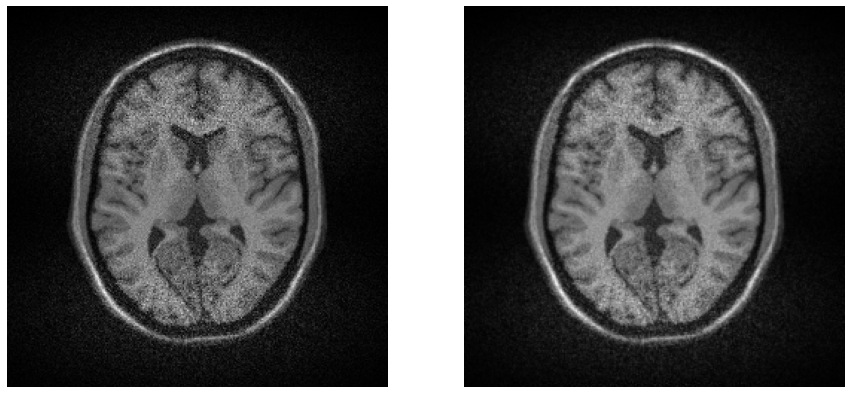

In [7]:
plot([I2,conv(I2,9,0.5)],["",""])

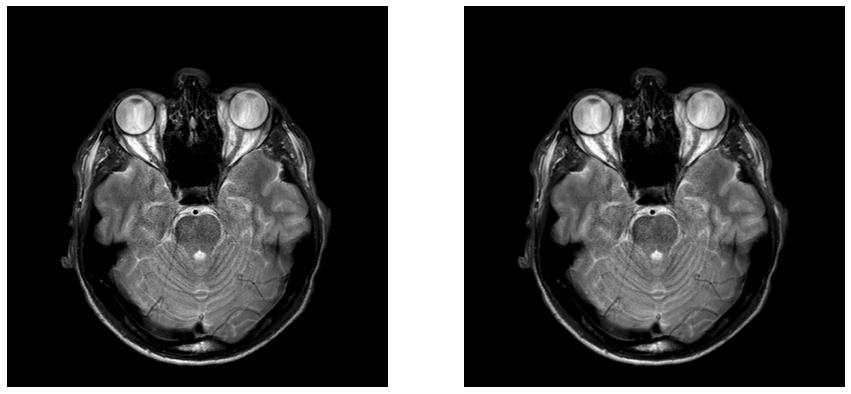

In [8]:
plot([I3,conv(I3,9,0.5)],["",""])

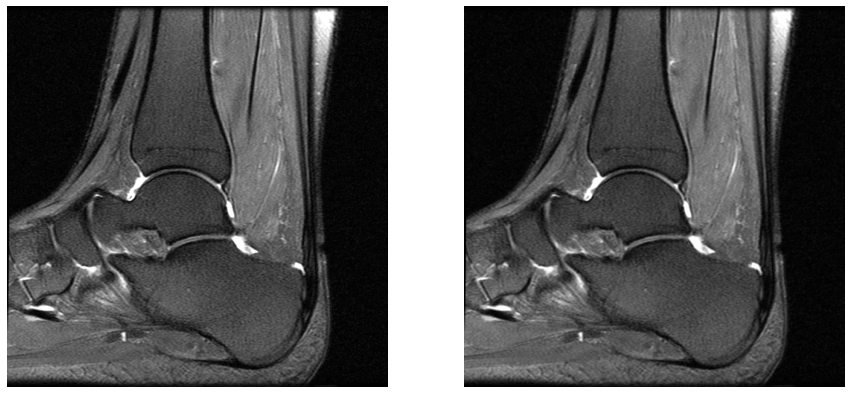

In [9]:
plot([I4,conv(I4,9,0.5)],["",""])

### Filtracja bilateralna

1. Zdefiniuj dodatkowy parametr: wariancję $\delta_R$.
3. Wykonaj kopię obrazu wejściowego: `IBilateral = Input.copy()`
4. Wykonaj podwójną pętlę po obrazie. Pomiń ramkę, dla której nie jest zdefiniowany kontekst o wybranej wielkości.
5. W każdej iteracji stwórz dwuwymiarową tablicę zawierającą aktualny kontekst.
6. Napisz funkcję, która będzie obliczała nową wartość piksela.
Argumentami funkcji są aktualnie przetwarzane okno, współczynniki filtra gausowskiego (takie same jak wcześniej) i wariancja $\delta_R$.
7. Oblicz odległość w przeciwdziedzinie (dla wartości pikseli).
8. Oblicz funkcję Gaussa dla obliczonych odległości z zadanym parametrem.
9. Wykonaj normalizację obliczonych współczynników.
10. Obliczoną wartość przypisz do odpowiedniego piksela kopii obrazu wejściowego.
11. Wyświetl wynik filtracji.
12. Porównaj wynik z obrazem oryginalnym.

In [10]:
def conv_bilateral(I, s, w, r):
    m = n = s
    h, k = m//2, n//2
    x, y = np.mgrid[-h:h+1, -k:k+1]
    g = np.exp(-(x**2 + y**2)/(2*w**2))
    g = g /g.sum() 
    
    Ic = I.copy()
    sx = len(I)
    sy = len(I[0])
    
    for i in range(s//2, sx-s//2):
        for j in range(s//2,sy-s//2):
            ctx = I[i-(s//2):i+(s//2)+1,j-(s//2):j+(s//2)+1].astype('float')
            p = 0
            distMat = np.zeros(ctx.shape)
            for ii in range(len(ctx)):
                for jj in range(len(ctx[ii])):
                    distMat[ii,jj] = np.exp(-(ctx[ii,jj] - ctx[s//2, s//2])*(ctx[ii,jj] - ctx[s//2, s//2])/(2*r*r))
            p = np.sum(ctx*g*distMat).astype(int)
            Ic[i][j] = p

    return Ic



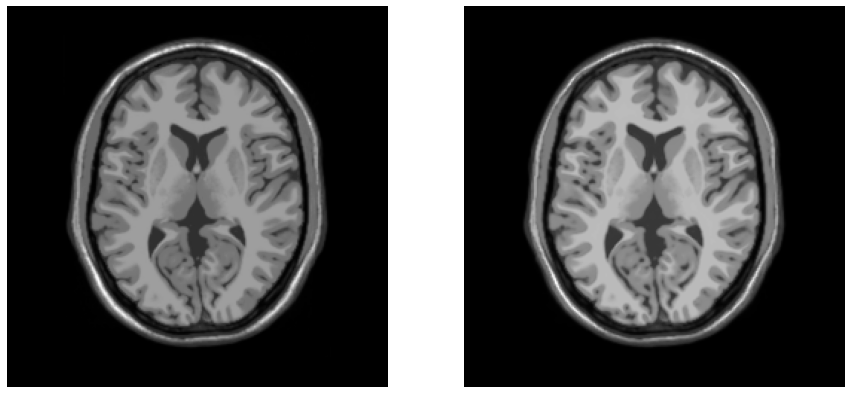

In [11]:
plot([If,conv_bilateral(If,15,0.5,20)],["",""])

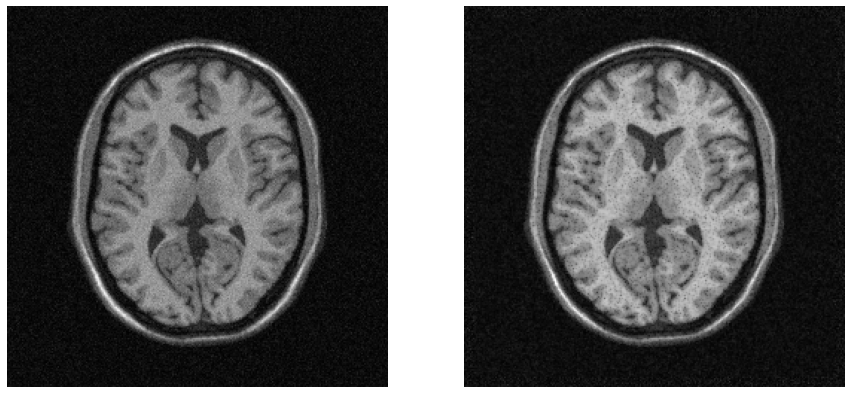

In [12]:
plot([I1,conv_bilateral(I1,15,0.5,20)],["",""])

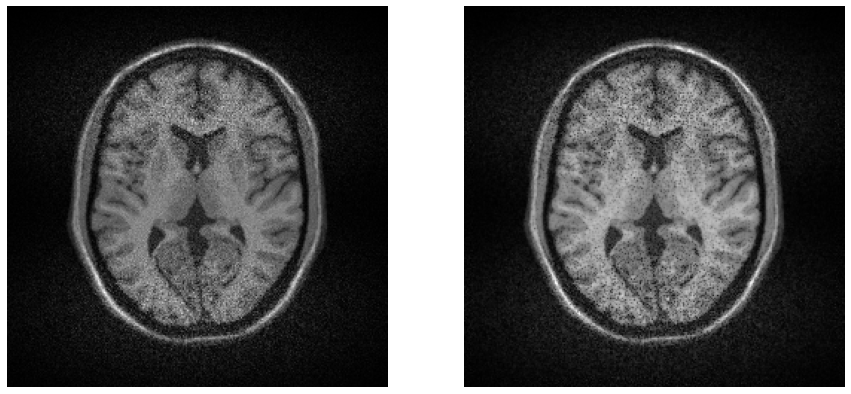

In [13]:
plot([I2,conv_bilateral(I2,15,0.5,20)],["",""])

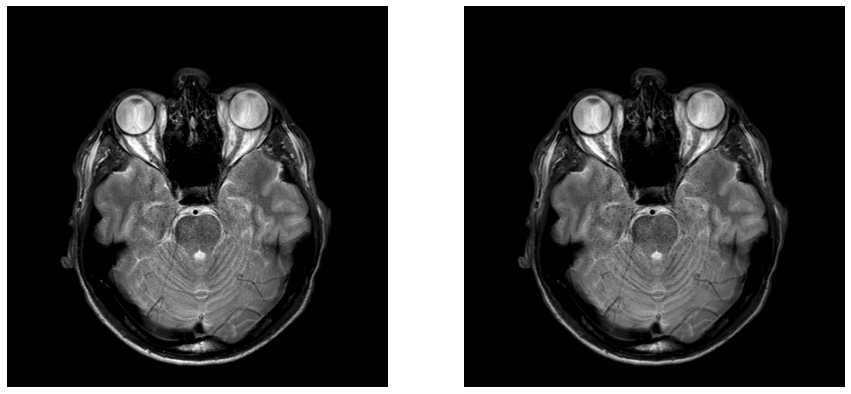

In [14]:
plot([I3,conv_bilateral(I3,15,0.5,20)],["",""])

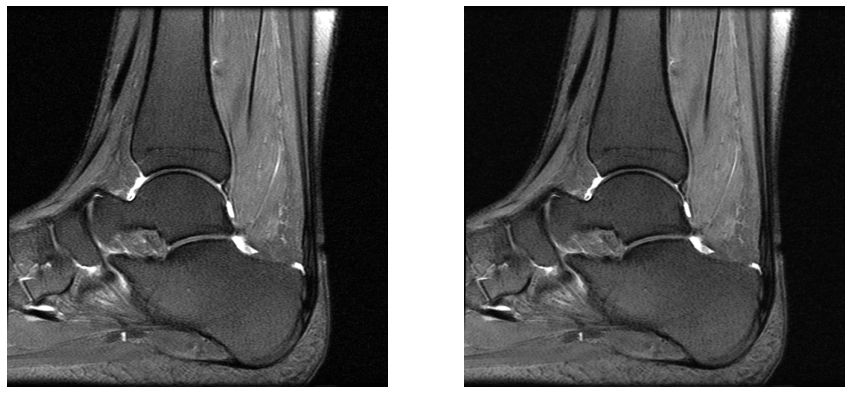

In [15]:
plot([I4,conv_bilateral(I4,15,0.5,20)],["",""])